Runs two basic convolutional networks on the pilot dataset.

### Things to do next
- Figure out how to do regression (see below).
- ~~Figure out how to do multitask learning (i.e. try to predict the different reps and different genes).~~
- ~~Run on the scale up dataset.~~
- Read up on the "Interpreting a DragoNN model using filter visualization" and "Interpreting data with a DragoNN model" in the Dragonn tutorial.

### Installing Dragonn
- Clone from https://github.com/kundajelab/dragonn
- ```python setup.py```
    - I needed to ```brew install geos```

In [1]:
from dragonn import models

from collections import OrderedDict
from pprint import pprint
from warnings import warn

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Using Theano backend.
/Users/andrewlamb/anaconda/lib/python2.7/site-packages/Theano-0.8.2-py2.7.egg/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Read in the pilot data.
- Samples are sequences that will be one hot encoded
- Try and predict the normalized values. **I couldn't figure out how to do regression with Dragonn, so I just rounded the values to 0 or 1 based on the median.**

In [2]:
key_to_seq = OrderedDict()

with open("../data/Scaleup_counts_sequences/ScaleUpDesign1.sequences.txt") as f:
    for line in f:
        key, seq = line.strip().split()
        
        # TODO: Figure out if this is an OK thing to do. 'N' basically means the 
        # sequencing software couldn't figure out what the base was...?
        if "N" in seq:
            warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
            seq = seq.replace("N", "A")
        
        assert key not in key_to_seq
        key_to_seq[key] = seq
        
with open("../data/Scaleup_counts_sequences/ScaleUpDesign2.sequences.txt") as f:
    for line in f:
        key, seq = line.strip().split()
        
        if "N" in seq:
            warn("Replacing 'N' bases in seq with 'A' in seq {}.".format(seq))
            seq = seq.replace("N", "A")
        
        assert key not in key_to_seq
        key_to_seq[key] = seq
        
pprint(key_to_seq.items()[:5])

print "{} total sequences of length {}".format(len(key_to_seq), len(key_to_seq.values()[0]))

/Users/andrewlamb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNGATCCCGCGGCCGTGTTTTCCTGGTGGCCCGGCCGTGCCTGAGGTTTCTCCCCGAGCCGCCGCCTCTGCGGGCTCCCGGGTGCCCTTGCCCTCACGGTCCCCGGCCCTCGCCCGTCTGTGCCCTCTTCCCCGCCCG.
/Users/andrewlamb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNGATCCCGCGGCCGTGTTTTCCTGGTGGCCCGGCCGTGCCTGAGGTTTCTCCCCGAGCCGCCGCCTCTGCGGGCTCCCGGGTGCCCTTGCCCTCACGGTCCCCGGCCCTCGCCCGTCTGTGCCCTCTTCCCCGCCCGCCGCC.
/Users/andrewlamb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNNNNNNNNNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAATGGAGTGTAGTTGAATGGAGTGGAATGGAATGCGATGGAATGGAGTGGAGTTGAGCAGAGTGAAGTGGAAAGGTGTAGAATGGA.


[('H1hesc_1_0_0_chr20_30310735',
  'GGGAGCCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCAC'),
 ('H1hesc_1_0_1_chr20_30310735',
  'CCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCC'),
 ('H1hesc_1_0_2_chr20_30310735',
  'AAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGC'),
 ('H1hesc_1_0_3_chr20_30310735',
  'GACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCC'),
 ('H1hesc_1_0_4_chr20_30310735',
  'AGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCCGCCTC')]
487137 total sequences of length 145


/Users/andrewlamb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNNNNNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAATGGAGTGTAGTTGAATGGAGTGGAATGGAATGCGATGGAATGGAGTGGAGTTGAGCAGAGTGAAGTGGAAAGGTGTAGAATGGAATGGA.
/Users/andrewlamb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNNNNNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAATGGAGTGTAGTTGAATGGAGTGGAATGGAATGCGATGGAATGGAGTGGAGTTGAGCAGAGTGAAGTGGAAAGGTGTAGAATGGAATGGAATGGA.
/Users/andrewlamb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Replacing 'N' bases in seq with 'A' in seq NNNGAATTCAATGGAGTGGACTGGAGTGCTGTGGGGTGGAGTGGAATGGAGTGTAGTTGAATGGAGTGGAATGGAATGCGATGGAATGGAGTGGAGTTGAGCAGAGTGAAGTGGAAAGGTGTAGAATGGAATGGAATGGAGTGGA.


In [3]:
data = {}
cell_types =  ["HepG2", "K562"]
promoters = ["SV40P", "minP"]
design_names = ["ScaleUpDesign1", "ScaleUpDesign2"]

for cell_type in cell_types:
    for promoter in promoters:
        experiment_key = (cell_type, promoter)
        data[experiment_key] = {}
        for design_name in design_names:
            # Take the mean of the two reps.
            with open("../data/Scaleup_normalized/{}_{}_{}_mRNA_Rep1.normalized".format(cell_type, design_name, promoter)) as f:
                for line in f:
                    parts = line.strip().split()

                    key = parts[0]
                    val = float(parts[1])
                    assert key not in data[experiment_key]
                    data[experiment_key][key] = val

            with open("../data/Scaleup_normalized/{}_{}_{}_mRNA_Rep2.normalized".format(cell_type, design_name, promoter)) as f:
                for line in f:
                    parts = line.strip().split()

                    key = parts[0]
                    val = float(parts[1])
                    assert key in data[experiment_key]
                    data[experiment_key][key] = (data[experiment_key][key] + val) / 2.0

        assert set(data[experiment_key].keys()) == set(key_to_seq.keys())
            
print "Data from experiment {}:".format(data.items()[0][0])
pprint(data.items()[0][1].items()[:5])

Data from experiment ('HepG2', 'minP'):
[('Huvec_15_5_12_chr9_134025315', -0.8987649255400356),
 ('Huvec_5_556_25_chr16_3727095', -0.6722025396114724),
 ('Huvec_6_62_1_chr20_50358975', 0.0),
 ('Huvec_10_36_24_chr3_10502015', 0.0),
 ('K562_12_179_27_chr3_69021795', 0.0)]


In [4]:
# One hot encode DNA sequences the standard way.
bases = ['A', 'T', 'C', 'G']

def one_hot_encode_seq(seq):
    result = np.zeros((len(bases), len(seq)))
    
    for i, base in enumerate(seq):
        result[bases.index(base), i] = 1

    return result

def seqs_to_encoded_matrix(seqs):
    # Wrangle the data into a shape that Dragonn wants.
    result = np.concatenate(
        map(one_hot_encode_seq, seqs)
    ).reshape(
        len(seqs), 1, len(bases), len(seqs[0])
    )
    
    # Check we actually did the encoding right.
    for i in range(len(seqs)):
        for j in range(len(seqs[0])):
            assert sum(result[i, 0, :, j]) == 1
    
    return result

In [5]:
X = seqs_to_encoded_matrix(key_to_seq.values())

In [6]:
X.shape

(487137, 1, 4, 145)

In [7]:
# Just round to the median, to make this a classification task for now.
experiment_labels = []
for experiment_key, key_to_normalized in data.items():
    median = np.median(key_to_normalized.values())
    experiment_labels.append(
        np.array(map(lambda key: key_to_normalized[key] > median, key_to_seq.keys())).reshape(-1, 1)
    )

y = np.hstack(experiment_labels)

In [8]:
y.shape

(487137, 4)

In [9]:
X[:5, :, :, :]

array([[[[ 0.,  0.,  0., ...,  0.,  1.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  1.,  0.,  1.],
         [ 1.,  1.,  1., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 1.,  1.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  1.],
         [ 0.,  0.,  1., ...,  1.,  1.,  0.]]],


       [[[ 0.,  1.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  1.,  0.,  0.],
         [ 0.,  0.,  1., ...,  0.,  1.,  1.],
         [ 1.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 1.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  1.,  0.],
         [ 0.,  0.,  0., ...,  1.,  0.,  1.],
         [ 0.,  1.,  1., ...,  0.,  0.,  0.]]]])

In [10]:
y[:5, :]

array([[ True, False, False, False],
       [ True,  True, False,  True],
       [ True,  True, False, False],
       [ True,  True, False, False],
       [ True,  True, False, False]], dtype=bool)

In [11]:
n_valid = 100
X_train = X[:-n_valid,:,:,:]
y_train = y[:-n_valid,:]

X_valid = X[-n_valid:,:,:,:]
y_valid = y[-n_valid:,:]

Start with the model used in the Dragonn tutorial. Train and plot the train and validation loss.

In [12]:
model = models.SequenceDNN(
    seq_length=X_train.shape[3],
    num_filters=[1],
    conv_width=[45],
    pool_width=45,
    num_tasks=y_train.shape[1]
)

In [13]:
model.train(X_train, y_train, (X_valid, y_valid))

Training model (* indicates new best result)...
Epoch 1:
Train Task 0: Loss: 0.6578	Balanced Accuracy: 61.13%	 auROC: 0.635	 auPRC: 0.653	 auPRG: 0.244
	Recall at 5%|10%|20% FDR: 0.1%|1.1%|12.1%	 Num Positives: 243504	 Num Negatives: 243533
Task 1: Loss: 0.6618	Balanced Accuracy: 60.39%	 auROC: 0.624	 auPRC: 0.646	 auPRG: 0.216
	Recall at 5%|10%|20% FDR: 0.1%|1.1%|11.3%	 Num Positives: 243508	 Num Negatives: 243529
Task 2: Loss: 0.3716	Balanced Accuracy: 50.00%	 auROC: 0.632	 auPRC: 0.207	 auPRG: 0.328
	Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 62968	 Num Negatives: 424069
Task 3: Loss: 0.4235	Balanced Accuracy: 50.00%	 auROC: 0.651	 auPRC: 0.402	 auPRG: 0.363
	Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 79818	 Num Negatives: 407219
Valid Task 0: Loss: 0.7665	Balanced Accuracy: 47.92%	 auROC: 0.472	 auPRC: 0.619	 auPRG: -0.036
	Recall at 5%|10%|20% FDR: 1.6%|1.6%|1.6%	 Num Positives: 64	 Num Negatives: 36
Task 1: Loss: 0.7331	Balanced Accuracy: 49.17%	 auROC

In [14]:
def print_loss(model):
    train_losses, valid_losses = [np.array([epoch_metrics['Loss'] for epoch_metrics in metrics])
                                  for metrics in (model.train_metrics, model.valid_metrics)]

    # Pretty sure early stopping works by taking the mean of losses, might want to double check
    train_losses = train_losses.mean(axis=1)
    valid_losses = valid_losses.mean(axis=1)

    f = plt.figure(figsize=(10, 4))
    ax = f.add_subplot(1, 1, 1)
    
    ax.plot(range(len(train_losses)), train_losses, label='Training',lw=4)
    ax.plot(range(len(train_losses)), valid_losses, label='Validation', lw=4)
    
    min_loss_indx = min(enumerate(valid_losses), key=lambda x: x[1])[0]
    ax.plot([min_loss_indx, min_loss_indx], [0, 1.0], 'k--', label='Early Stop')
    ax.legend(loc="upper right")
    ax.set_ylabel("Loss")
    ax.set_ylim((0.0,1.0))
    ax.set_xlabel("Epoch")
    plt.show()

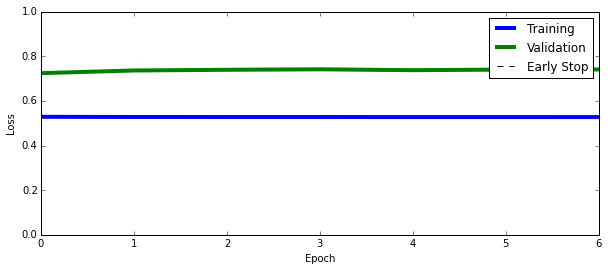

In [15]:
print_loss(model)

Train and test on a multi-filter model (not a lot of filters).

In [18]:
multi_filter_model = models.SequenceDNN(
    seq_length=X_train.shape[3],
    num_filters=[2],
    conv_width=[45],
    pool_width=45,
    dropout=0.1,
    num_tasks=y_train.shape[1]
)

In [19]:
multi_filter_model.train(X_train, y_train, (X_valid, y_valid))

Training model (* indicates new best result)...
Epoch 1:
Train Task 0: Loss: 0.6554	Balanced Accuracy: 60.95%	 auROC: 0.649	 auPRC: 0.658	 auPRG: 0.273
	Recall at 5%|10%|20% FDR: 0.0%|0.7%|12.4%	 Num Positives: 243504	 Num Negatives: 243533
Task 1: Loss: 0.6628	Balanced Accuracy: 60.40%	 auROC: 0.621	 auPRC: 0.645	 auPRG: 0.214
	Recall at 5%|10%|20% FDR: 0.1%|0.9%|11.9%	 Num Positives: 243508	 Num Negatives: 243529
Task 2: Loss: 0.3734	Balanced Accuracy: 50.00%	 auROC: 0.631	 auPRC: 0.173	 auPRG: 0.351
	Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 62968	 Num Negatives: 424069
Task 3: Loss: 0.4235	Balanced Accuracy: 50.00%	 auROC: 0.650	 auPRC: 0.219	 auPRG: 0.339
	Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 79818	 Num Negatives: 407219
Valid Task 0: Loss: 0.7613	Balanced Accuracy: 45.75%	 auROC: 0.476	 auPRC: 0.617	 auPRG: 0.075
	Recall at 5%|10%|20% FDR: 3.1%|3.1%|3.1%	 Num Positives: 64	 Num Negatives: 36
Task 1: Loss: 0.7455	Balanced Accuracy: 49.17%	 auROC:

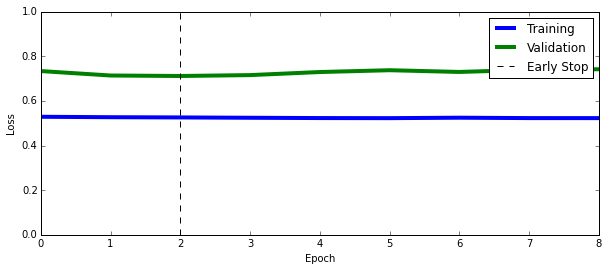

In [20]:
print_loss(multi_filter_model)